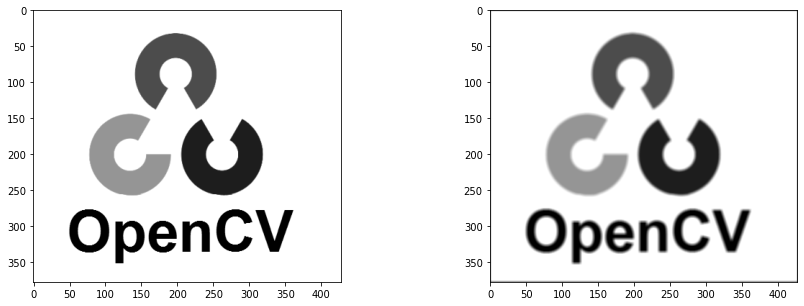

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def convolution2d(image, kernel, pad_x, pad_y):
    m, n = kernel.shape
    image = cv2.copyMakeBorder(image, pad_y, pad_y, pad_x, pad_x, cv2.BORDER_CONSTANT, value=0)
    y, x = image.shape
    y_out = y - m + 1
    x_out  = x - n + 1
    new_image = np.zeros((y_out, x_out))
    for i in range(y_out):
        for j in range(x_out):
            new_image[i][j] = np.sum(image[i:i+m, j:j+n]*kernel)
    return new_image


img = cv2.imread('opencv_logo.png', cv2.IMREAD_GRAYSCALE) 
kernel = np.ones((5,5),np.float32)/25

use_cv2_filter2D = True
if use_cv2_filter2D:
    dst = cv2.filter2D(img,-1,kernel,borderType=cv2.BORDER_CONSTANT)
else:
    # assuming kernel size is odd
    m, n = kernel.shape
    pad_y = (m-1)//2
    pad_x = (n-1)//2
    dst = convolution2d(img, kernel, pad_x, pad_y)

plt.subplot(1,2,1)
plt.imshow(img, cmap ='gray')

plt.subplot(1,2,2)
plt.imshow(dst, cmap ='gray')

plt.gcf().set_size_inches(15, 5)
plt.show()